<a href="https://colab.research.google.com/github/jochocka/machine-learning-bootcamp/blob/main/unsupervised/04_anomaly_detection/03_anomaly_detection_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### prophet
Strona biblioteki: [https://facebook.github.io/prophet/](https://facebook.github.io/prophet/)  

Dokumentacja/User Guide: [https://facebook.github.io/prophet/docs/quick_start.html](https://facebook.github.io/prophet/docs/quick_start.html)

Biblioteka do pracy z szeregami czasowymi od Facebook'a

Aby zainstalować bibliotekę prophet, użyj polecenia poniżej:
```
!pip install fbprophet
```
Aby zaktualizować do najnowszej wersji użyj polecenia poniżej:
```
!pip install --upgrade fbprophet
```
Kurs stworzony w oparciu o wersję `0.5`

### Spis treści:
1. [Import bibliotek](#0)
2. [Załadowanie danych](#1)
3. [Wizualizacja danych](#2)
4. [Przygotowanie danych](#3)
5. [Prophet - budowa modelu](#4)
6. [Wizualizacja działania modelu](#5)
7. [Budowa modelu - wrzesień](#6)




### <a name='0'></a> Import bibliotek

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import fbprophet

np.random.seed(41)
fbprophet.__version__

'0.5'

### <a name='1'></a> Załadowanie danych

In [ ]:
df = pd.read_csv('https://storage.googleapis.com/esmartdata-courses-files/ml-course/traffic.csv',
                 parse_dates=['timestamp'])
df.head()

timestamp    count
0 2018-09-25 14:01:00  182.478
1 2018-09-25 14:02:00  176.231
2 2018-09-25 14:03:00  183.917
3 2018-09-25 14:04:00  177.798
4 2018-09-25 14:05:00  165.469

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14398 entries, 0 to 14397
Data columns (total 2 columns):
timestamp    14398 non-null datetime64[ns]
count        14398 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 225.1 KB


### <a name='2'></a> Wizualizacja danych

In [ ]:
px.line(df, x='timestamp', y='count', title='Anomaly Detection - web traffic', width=950, height=500,
        template='plotly_dark', color_discrete_sequence=['#42f5d4'])

In [ ]:
px.scatter(df, x='timestamp', y='count', title='Anomaly Detection - web traffic', width=950, height=500,
           template='plotly_dark', color_discrete_sequence=['#42f5d4'])

### <a name='3'></a> Przygotowanie danych

In [ ]:
df.head(3)

timestamp    count
0 2018-09-25 14:01:00  182.478
1 2018-09-25 14:02:00  176.231
2 2018-09-25 14:03:00  183.917

In [ ]:
data = df.copy()
data.columns = ['ds', 'y']
data.head(3)

ds        y
0 2018-09-25 14:01:00  182.478
1 2018-09-25 14:02:00  176.231
2 2018-09-25 14:03:00  183.917

Danymi wejściowymi do klasy Prophet jest obiekt DataFrame biblioteki pandas. Wejściowy DataFrame składa się z dwóch kolumn:
* ds (datestamp, odpowiednio sformatowana kolumna, np. YYYY-MM-DD dla daty, YYYY-MM-DD HH:MM:SS dla dokładnego czasu )
* y (kolumna numeryczna, reprezentująca wartość, którą chcemy przewidywać)


### <a name='4'></a> Prophet - budowa modelu

In [ ]:
from fbprophet import Prophet

Prophet?

In [ ]:
model = Prophet(daily_seasonality=True, yearly_seasonality=False, weekly_seasonality=False,
                interval_width=0.99, changepoint_range=0.8)

model.fit(data)
forecast = model.predict(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [ ]:
forecast.head(3)

ds       trend  ...  multiplicative_terms_upper        yhat
0 2018-09-25 14:01:00  111.590807  ...                         0.0  160.468847
1 2018-09-25 14:02:00  111.592096  ...                         0.0  160.535097
2 2018-09-25 14:03:00  111.593385  ...                         0.0  160.597814

[3 rows x 16 columns]

In [ ]:
forecast[['ds', 'trend', 'yhat', 'yhat_lower', 'yhat_upper']].head(3)

ds       trend        yhat  yhat_lower  yhat_upper
0 2018-09-25 14:01:00  111.590807  160.468847  132.708785  187.428637
1 2018-09-25 14:02:00  111.592096  160.535097  130.220390  191.671745
2 2018-09-25 14:03:00  111.593385  160.597814  135.449525  185.843557

In [ ]:
forecast['real'] = data['y']
forecast['anomaly'] = 1
forecast.loc[forecast['real'] > forecast['yhat_upper'], 'anomaly'] = -1
forecast.loc[forecast['real'] < forecast['yhat_lower'], 'anomaly'] = -1
forecast.head(3)

ds       trend  yhat_lower  ...        yhat     real  anomaly
0 2018-09-25 14:01:00  111.590807  132.708785  ...  160.468847  182.478        1
1 2018-09-25 14:02:00  111.592096  130.220390  ...  160.535097  176.231        1
2 2018-09-25 14:03:00  111.593385  135.449525  ...  160.597814  183.917        1

[3 rows x 18 columns]

### <a name='5'></a> Wizualizacja działania modelu

In [ ]:
px.scatter(forecast, x='ds', y='real', color='anomaly', color_continuous_scale='Bluyl',
           title='Anomaly Detection in Time Series', template='plotly_dark', width=950, height=500)

In [ ]:
future = model.make_future_dataframe(periods=1440, freq='Min')
future

ds
0     2018-09-25 14:01:00
1     2018-09-25 14:02:00
2     2018-09-25 14:03:00
3     2018-09-25 14:04:00
4     2018-09-25 14:05:00
...                   ...
15833 2018-10-06 13:54:00
15834 2018-10-06 13:55:00
15835 2018-10-06 13:56:00
15836 2018-10-06 13:57:00
15837 2018-10-06 13:58:00

[15838 rows x 1 columns]

In [ ]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

ds        yhat  yhat_lower  yhat_upper
0 2018-09-25 14:01:00  160.468847  131.914402  187.603827
1 2018-09-25 14:02:00  160.535097  132.491876  186.130397
2 2018-09-25 14:03:00  160.597814  133.636374  188.401335
3 2018-09-25 14:04:00  160.656972  131.934837  192.910531
4 2018-09-25 14:05:00  160.712546  131.894527  188.712363

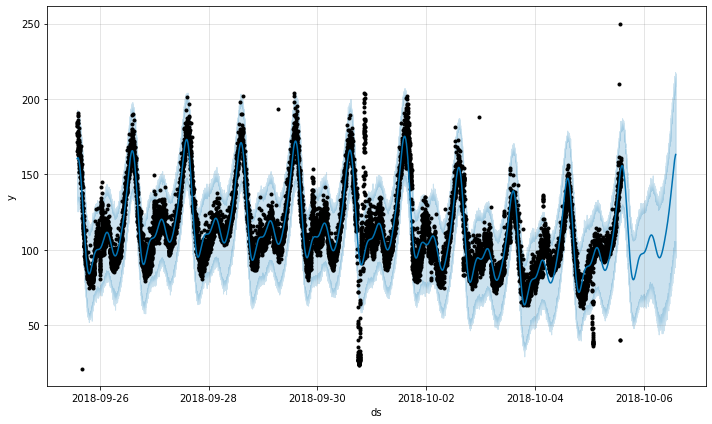

In [ ]:
_ = model.plot(forecast)

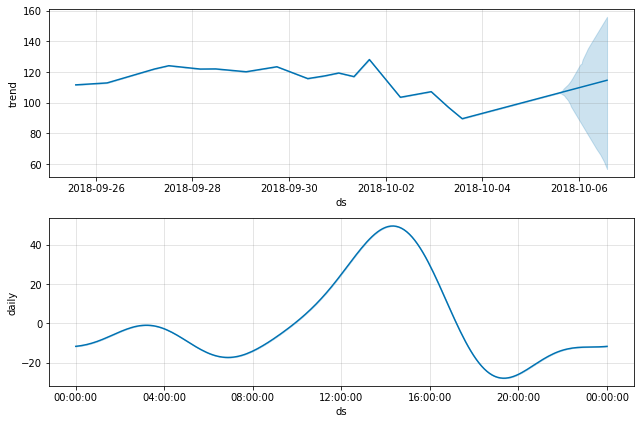

In [ ]:
_ = model.plot_components(forecast)

In [ ]:
from fbprophet.plot import plot_plotly

plot_plotly(model, forecast, xlabel='czas', ylabel='ruch webowy')

### <a name='6'></a> Budowa modelu - wrzesień

In [ ]:
data_sep = df[df['timestamp'].dt.month == 9]
data_sep.columns = ['ds', 'y']
data_sep.head()

ds        y
0 2018-09-25 14:01:00  182.478
1 2018-09-25 14:02:00  176.231
2 2018-09-25 14:03:00  183.917
3 2018-09-25 14:04:00  177.798
4 2018-09-25 14:05:00  165.469

In [ ]:
model = Prophet(daily_seasonality=True, yearly_seasonality=False, weekly_seasonality=False,
                seasonality_mode='multiplicative', interval_width=0.99, changepoint_range=0.8)

model.fit(data_sep)
forecast = model.predict(data_sep)
forecast[['ds', 'trend', 'yhat', 'yhat_lower', 'yhat_upper']].head(3)

ds       trend        yhat  yhat_lower  yhat_upper
0 2018-09-25 14:01:00  115.062749  165.385430  134.858474  194.678355
1 2018-09-25 14:02:00  115.047325  165.413429  134.632560  196.857028
2 2018-09-25 14:03:00  115.031901  165.437526  132.896710  193.128023

In [ ]:
forecast['real'] = data['y']
forecast['anomaly'] = 1
forecast.loc[forecast['real'] > forecast['yhat_upper'], 'anomaly'] = -1
forecast.loc[forecast['real'] < forecast['yhat_lower'], 'anomaly'] = -1
forecast.head(3)

ds       trend  yhat_lower  ...        yhat     real  anomaly
0 2018-09-25 14:01:00  115.062749  134.858474  ...  165.385430  182.478        1
1 2018-09-25 14:02:00  115.047325  134.632560  ...  165.413429  176.231        1
2 2018-09-25 14:03:00  115.031901  132.896710  ...  165.437526  183.917        1

[3 rows x 18 columns]

In [ ]:
px.scatter(forecast, x='ds', y='real', color='anomaly', color_continuous_scale='Bluyl',
           title='Anomaly Detection in Time Series - September', template='plotly_dark', width=950, height=500)

In [ ]:
future = model.make_future_dataframe(periods=1440, freq='Min')
future

ds
0    2018-09-25 14:01:00
1    2018-09-25 14:02:00
2    2018-09-25 14:03:00
3    2018-09-25 14:04:00
4    2018-09-25 14:05:00
...                  ...
9234 2018-10-01 23:55:00
9235 2018-10-01 23:56:00
9236 2018-10-01 23:57:00
9237 2018-10-01 23:58:00
9238 2018-10-01 23:59:00

[9239 rows x 1 columns]

In [ ]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

ds        yhat  yhat_lower  yhat_upper
0 2018-09-25 14:01:00  165.385430  134.432248  195.622322
1 2018-09-25 14:02:00  165.413429  137.562011  195.817105
2 2018-09-25 14:03:00  165.437526  135.052506  196.214828
3 2018-09-25 14:04:00  165.457699  134.715172  196.410234
4 2018-09-25 14:05:00  165.473925  137.032323  196.102480

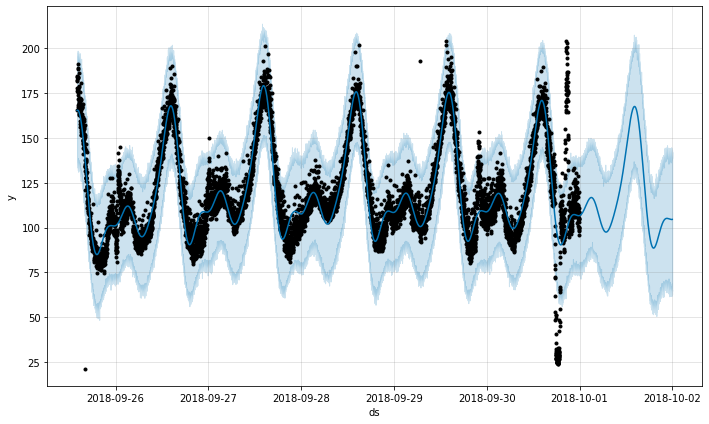

In [ ]:
_ = model.plot(forecast)

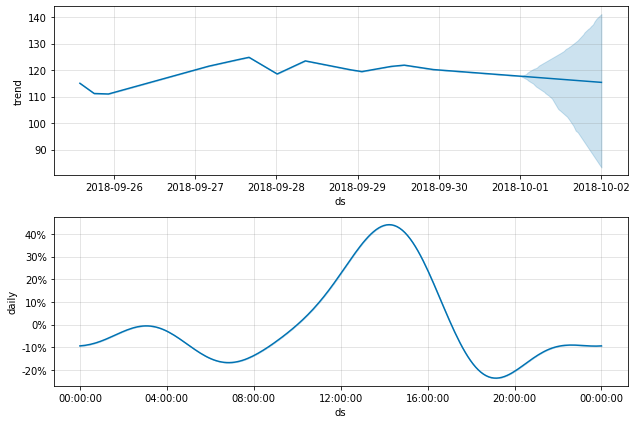

In [ ]:
_ = model.plot_components(forecast)

In [ ]:
plot_plotly(model, forecast, xlabel='czas', ylabel='ruch webowy')